In [2]:
#Hilfscode zum finden meines Arbeitsverzeichnis und der vorhanden Dateien
import os
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

input_dir = '/kaggle/input/'

for root, dirs, files in os.walk(input_dir):
    print(f"Verzeichnis: {root}")
    print(f"Unterordner: {dirs}")
    print(f"Dateien: {files}")
    print('---')

Aktuelles Arbeitsverzeichnis: /kaggle/working
Verzeichnis: /kaggle/input/
Unterordner: ['datasets-naivebayes']
Dateien: []
---
Verzeichnis: /kaggle/input/datasets-naivebayes
Unterordner: []
Dateien: ['dataset_base.xlsx', 'dataset.xlsx', 'dataset_roberta_sentences.xlsx', 'dataset_roberta_chunks.xlsx', 'dataset_finbert_sentences.xlsx', 'dataset_finbert_chunks.xlsx']
---


In [83]:
import pandas as pd
import numpy as np

print("Load Datasets...")

# Alle Datasets laden
df_data = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset.xlsx')
df_base = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_base.xlsx')
df_fin_sen = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_finbert_sentences.xlsx')
df_fin_chk = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_finbert_chunks.xlsx')
df_rob_sen = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_roberta_sentences.xlsx')
df_rob_chk = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_roberta_chunks.xlsx')

# Date-Index setzen und One-Hot-Encoded columns konvertieren für alle DataFrames
for df in [df_data, df_base, df_fin_sen, df_fin_chk, df_rob_sen, df_rob_chk]:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
    onehot_cols = ['Index_MDAX', 'Index_SDAX']
    df[onehot_cols] = df[onehot_cols].astype(np.float64)

print("✓ All Datasets succesfully loaded!")
print(f"df_data: {df_data.shape}")
print(f"df_base: {df_base.shape}")
print(f"df_fin_sen: {df_fin_sen.shape}")
print(f"df_fin_chk: {df_fin_chk.shape}")
print(f"df_rob_sen: {df_rob_sen.shape}")
print(f"df_rob_chk: {df_rob_chk.shape}")


Load Datasets...
✓ All Datasets succesfully loaded!
df_data: (69, 14)
df_base: (69, 10)
df_fin_sen: (69, 11)
df_fin_chk: (69, 11)
df_rob_sen: (69, 11)
df_rob_chk: (69, 11)


In [82]:
#None Float Detection
dataframes = {
    'df_data': df_data,
    'df_base': df_base,
    'df_fin_sen': df_fin_sen,
    'df_fin_chk': df_fin_chk,
    'df_rob_sen': df_rob_sen,
    'df_rob_chk': df_rob_chk
}

for name, df in dataframes.items():
    print("\n" + "=" * 50)
    print(f"DATASET: {name}")
    print(f"Shape: {df.shape}")
    
    # Identify columns that are not float64
    non_float_cols = [col for col in df.columns if df[col].dtype != 'float64']
    not_float_str = ", ".join(non_float_cols) if non_float_cols else "None"
    print(f"Columns not float64: {not_float_str}")
    
    print("=" * 50)
    


DATASET: df_data
Shape: (69, 14)
Columns not float64: None

DATASET: df_base
Shape: (69, 10)
Columns not float64: None

DATASET: df_fin_sen
Shape: (69, 11)
Columns not float64: None

DATASET: df_fin_chk
Shape: (69, 11)
Columns not float64: None

DATASET: df_rob_sen
Shape: (69, 11)
Columns not float64: None

DATASET: df_rob_chk
Shape: (69, 11)
Columns not float64: None


# Visualisierungen Datensatz

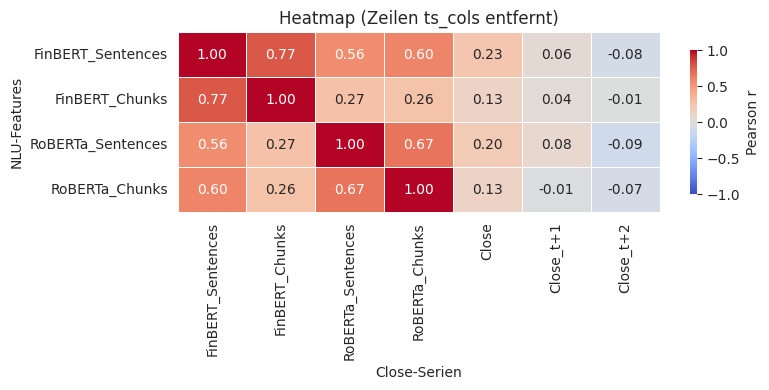

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Konfiguration
config = {
    # True  → nur Zeilen ts_cols löschen (Heatmap 1)
    # False → Zeilen ts_cols und Spalten nlp_cols löschen (Heatmap 2)
    'rows_only': True,
    'figsize': (8, 4),
    'cmap': 'coolwarm',
    'vmin': -1,
    'vmax': 1,
    'fmt': '.2f',
    'shrink': .8
}

# 1. Spalten definieren
nlp_cols = [
    'FinBERT_Sentences', 'FinBERT_Chunks',
    'RoBERTa_Sentences', 'RoBERTa_Chunks'
]
ts_cols  = ['Close', 'Close_t+1', 'Close_t+2']
all_cols = nlp_cols + ts_cols

# 2. DataFrame-Subset und Korrelationsmatrix
df_sub    = df_data[all_cols]
corr_full = df_sub.corr()

# 3. Auswahl der Heatmap
if config['rows_only']:
    # Variante 1: nur Zeilen löschen
    corr_plot = corr_full.drop(index=ts_cols, axis=0)
    title = 'Heatmap (Zeilen ts_cols entfernt)'
else:
    # Variante 2: Zeilen & Spalten löschen
    corr_plot = corr_full.drop(index=ts_cols, columns=nlp_cols)
    title = 'Heatmap (Zeilen ts_cols und Spalten nlp_cols entfernt)'

# 4. Heatmap plotten
plt.figure(figsize=config['figsize'])
sns.heatmap(
    corr_plot,
    annot=True,
    fmt=config['fmt'],
    cmap=config['cmap'],
    vmin=config['vmin'], vmax=config['vmax'],
    linewidths=0.5,
    cbar_kws={'shrink': config['shrink'], 'label': 'Pearson r'}
)
plt.title(title)
plt.ylabel('Features' if config['rows_only']==False else 'NLU-Features')
plt.xlabel('Close-Serien' if config['rows_only'] else 'Alle Features')
plt.tight_layout()
plt.show()


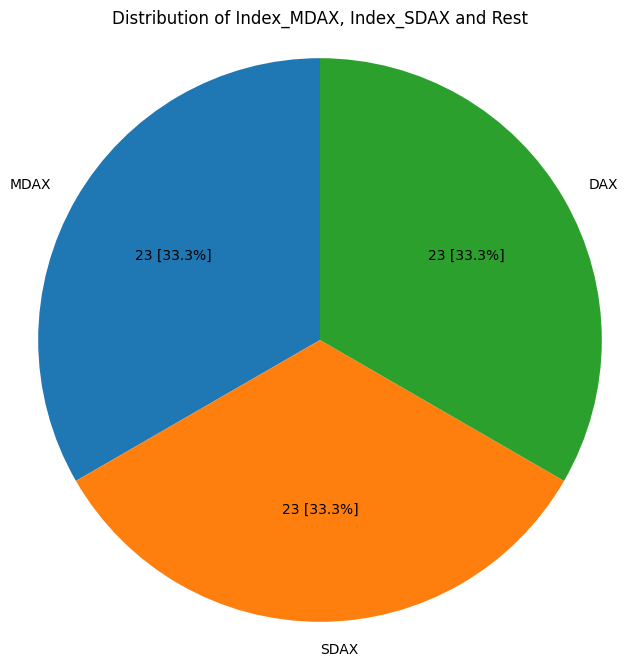

In [7]:
import matplotlib.pyplot as plt

# Calculate values for the pie chart
length_df = len(df_data)
sum_mdax = df_data['Index_MDAX'].sum()
sum_sdax = df_data['Index_SDAX'].sum()
rest = length_df - sum_mdax - sum_sdax

# Data for the pie chart
labels = ['MDAX', 'SDAX', 'DAX']
sizes = [sum_mdax, sum_sdax, rest]

# Create custom labels with absolute values and percentages
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val} [{pct:.1f}%]'
    return my_autopct

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=90)
plt.title('Distribution of Index_MDAX, Index_SDAX and Rest')
plt.axis('equal')  # Ensures a perfect circle
plt.show()


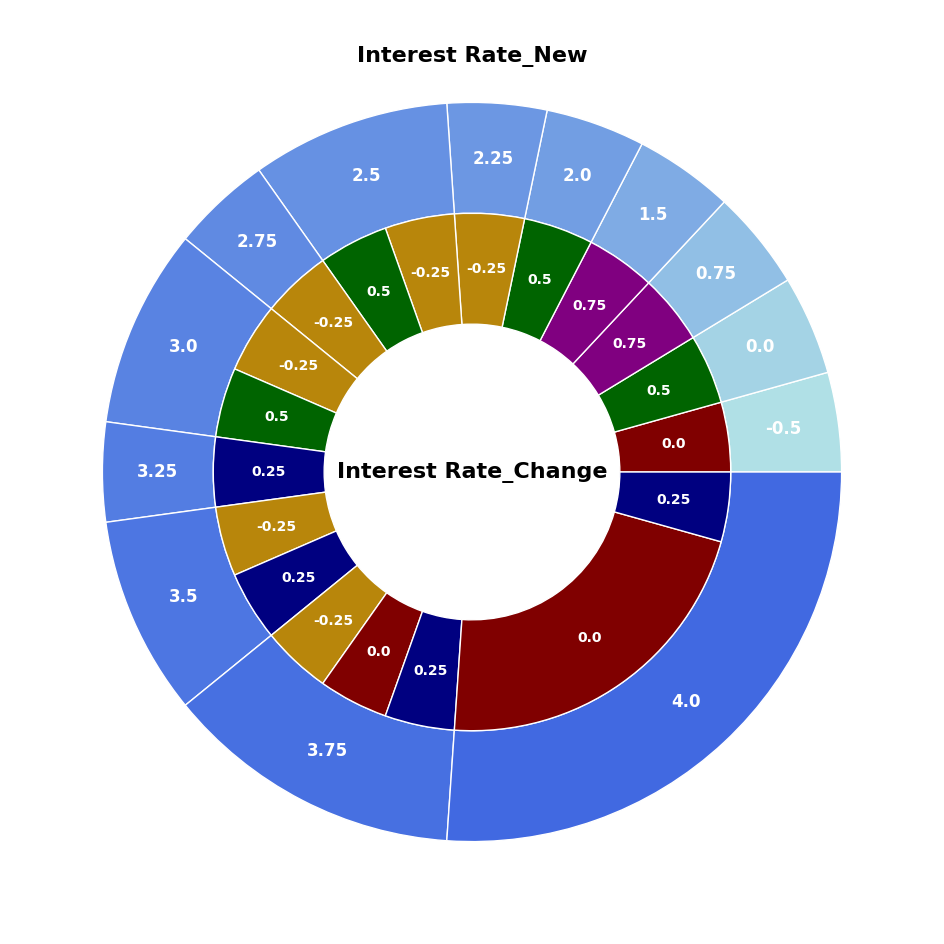

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Configuration dictionary
config = {
    'outer_ring_color_scale': {'min_value': -0.5, 'max_value': 4.0, 'color_min': '#B0E0E6', 'color_max': '#4169E1'},  # PowderBlue zu RoyalBlue
    'inner_ring_fixed_colors': {
    -0.25: '#B8860B',   # DarkGoldenrod (dunkles gold)
    0.0: '#800000',    # Maroon (dunkelrot)
    0.25: '#000080',   # Navy (dunkelblau)
    0.5: '#006400',    # DarkGreen (dunkelgrün)
    0.75: '#800080'    # Purple (dunkellila)
}



}

# Create combined data
combined_data = df_data[['Interest Rate_Old', 'Interest Rate_Change']].copy()

# Get data for both rings
outer_counts = combined_data['Interest Rate_Old'].value_counts().sort_index()
inner_sizes, inner_labels = [], []

for old_rate in outer_counts.index:
    subset = combined_data[combined_data['Interest Rate_Old'] == old_rate]
    change_counts = subset['Interest Rate_Change'].value_counts().sort_index()
    inner_sizes.extend(change_counts.values)
    inner_labels.extend(change_counts.index.astype(str))

# Create colormap for outer ring
cmap = mcolors.LinearSegmentedColormap.from_list('custom_scale', [config['outer_ring_color_scale']['color_min'], config['outer_ring_color_scale']['color_max']])
norm = mcolors.Normalize(vmin=config['outer_ring_color_scale']['min_value'], vmax=config['outer_ring_color_scale']['max_value'])
outer_colors = cmap(norm(outer_counts.index.astype(float)))

# Create colors for inner ring based on fixed color mapping
inner_colors = []
for label in inner_labels:
    value = float(label)
    if value in config['inner_ring_fixed_colors']:
        inner_colors.append(config['inner_ring_fixed_colors'][value])
    else:
        inner_colors.append('lightgray')  # Default color for unmapped values

# Setup plot
fig, ax = plt.subplots(figsize=(12, 12))
size = 0.3

# Create pies with colors
wedges_outer, _ = ax.pie(outer_counts.values, radius=1, labels=None, wedgeprops=dict(width=size, edgecolor='w'), colors=outer_colors)
wedges_inner, _ = ax.pie(inner_sizes, radius=1-size, labels=None, wedgeprops=dict(width=size, edgecolor='w'), colors=inner_colors)

# Add labels to rings
for wedges, labels, radius, fontsize in [(wedges_outer, outer_counts.index.astype(str), 1-size/2, 12), (wedges_inner, inner_labels, (1-size)-size/2, 10)]:
    for wedge, label in zip(wedges, labels):
        ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
        x = radius * np.cos(np.deg2rad(ang))
        y = radius * np.sin(np.deg2rad(ang))
        ax.text(x, y, label, ha='center', va='center', fontsize=fontsize, fontweight='bold', color='white')

# Add centered text and title
ax.text(0, 0, 'Interest Rate_Change', ha='center', va='center', fontsize=16, fontweight='bold', color='black')
ax.text(0.5, 0.95, 'Interest Rate_New', ha='center', va='center', fontsize=16, fontweight='bold', transform=ax.transAxes)
#plt.title('Interest Rate_New', fontsize=16, fontweight='bold')

ax.set(aspect='equal')
plt.show()


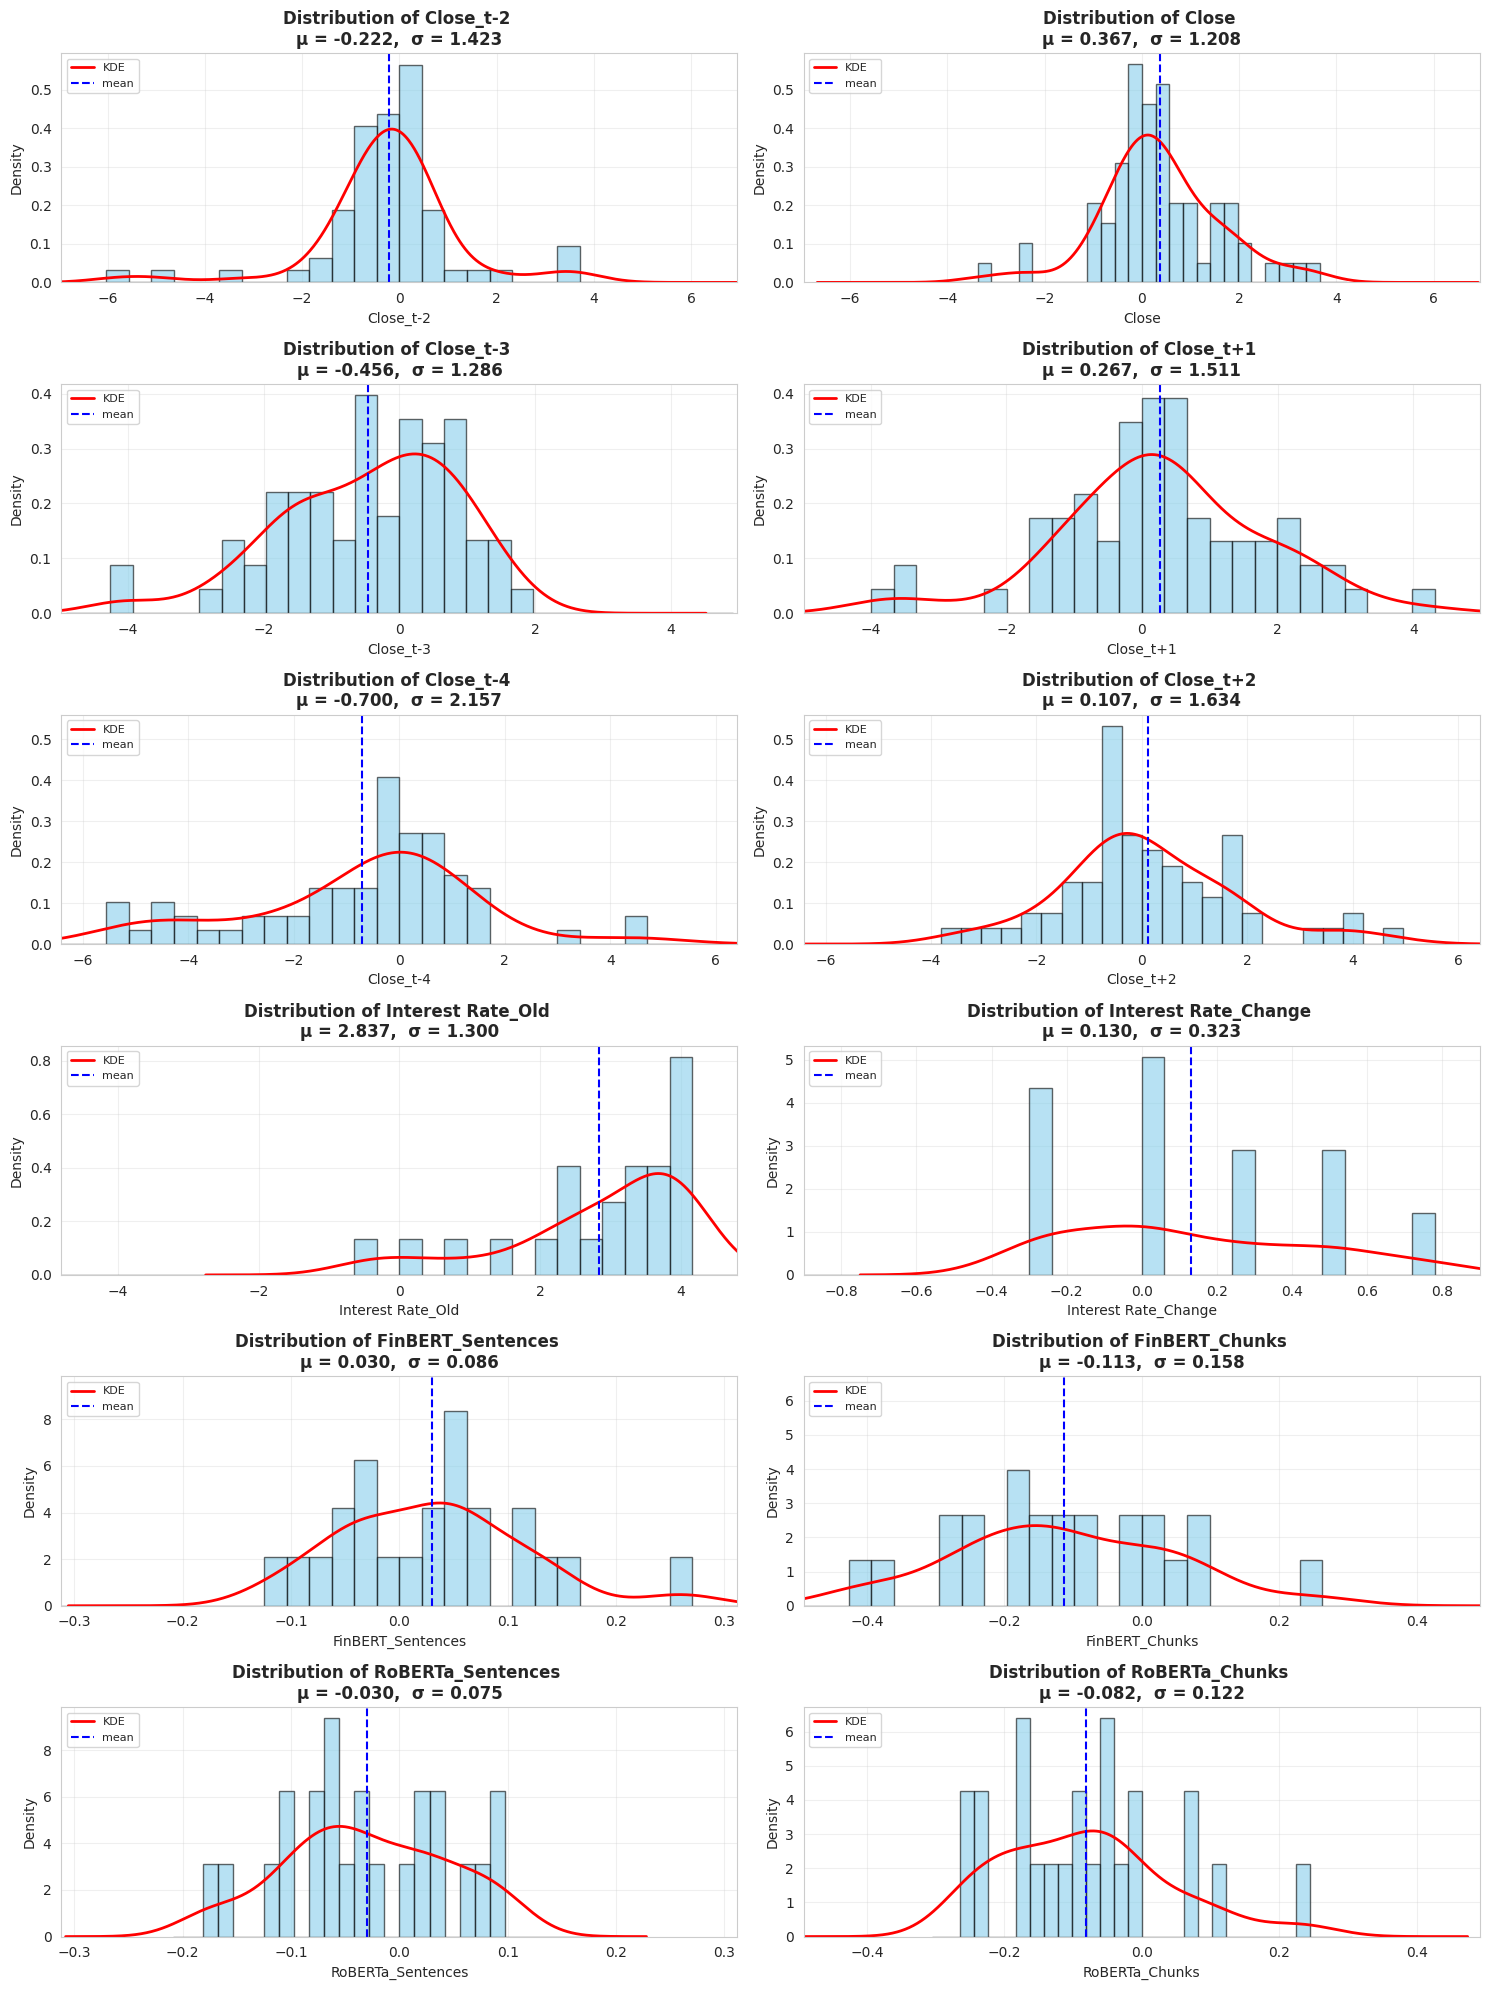

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# === KONFIGURATION ===
config = {
    'order':  [2, 9, 1, 10, 0, 11, 3, 4, 5, 6, 7, 8],
    'pairs':  [(0, 1), (2, 3), (4, 5), (8, 10), (9, 11)],
    'x_pad':  0.20,   # 20% Puffer um den größten Absolutwert
    'n_bins': 30      # Anzahl der Histogramm-Bins
}

# Spaltenliste ohne MDAX und SDAX
columns_all     = [c for c in df_data.columns if c not in ['Index_MDAX', 'Index_SDAX']]
columns_to_plot = [columns_all[i] for i in config['order']]

# Speicher für gepufferte X-Maxima und Y-Maxima jeder Achse
max_abs_vals = [0] * len(columns_to_plot)
max_y_vals   = [0] * len(columns_to_plot)

# === Erster Durchgang: Plots erzeugen, X- und Y-Maxima erfassen ===
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    data = df_data[col].dropna()
    μ = data.mean()
    σ = data.std()

    # X-Bereich mit Puffer berechnen
    raw_max = data.abs().max()
    pad     = raw_max * (1 + config['x_pad'])
    bins    = np.linspace(-pad, pad, config['n_bins'] + 1)
    max_abs_vals[i] = pad

    # Histogramm (Density)
    axes[i].hist(data, bins=bins, density=True, alpha=0.6,
                 color='skyblue', edgecolor='black')
    # KDE
    data.plot.kde(ax=axes[i], color='red', linewidth=2, bw_method='scott', label='KDE')

    # Mean-Linie, nur mit "mean" als Label
    axes[i].axvline(μ, color='blue', linestyle='--', linewidth=1.5, label='mean')

    # Titel bleibt unverändert
    axes[i].set_title(
        f'Distribution of {col} \n'
        f'μ = {μ:.3f},  σ = {σ:.3f}',
        fontsize=12, fontweight='bold'
    )

    # Achsenbeschriftungen & Legende
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].legend(loc='upper left', fontsize=8)
    axes[i].grid(alpha=0.3)

    # Y-Maximum nach dem Zeichnen erfassen
    _, y_top = axes[i].get_ylim()
    max_y_vals[i] = y_top

# Überflüssige Achsen ausblenden
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# === Zweiter Durchgang: Gemeinsame X-Limits für Gruppen setzen ===
for group in config['pairs']:
    shared_x = max(max_abs_vals[idx] for idx in group if idx < len(axes))
    for idx in group:
        if idx < len(axes):
            axes[idx].set_xlim(-shared_x, shared_x)

# Übrige Achsen individuell symmetrisch setzen
ungrouped = set(range(len(columns_to_plot))) - set(i for grp in config['pairs'] for i in grp)
for idx in ungrouped:
    axes[idx].set_xlim(-max_abs_vals[idx], max_abs_vals[idx])

# === Dritter Durchgang: Gemeinsame Y-Limits für Gruppen setzen ===
for group in config['pairs']:
    shared_y = max(max_y_vals[idx] for idx in group if idx < len(axes))
    for idx in group:
        if idx < len(axes):
            axes[idx].set_ylim(0, shared_y)

plt.tight_layout()

# Save with white background
plt.savefig('/kaggle/working/distribution_plots.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig('/kaggle/working/distribution_plots_transparent.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()


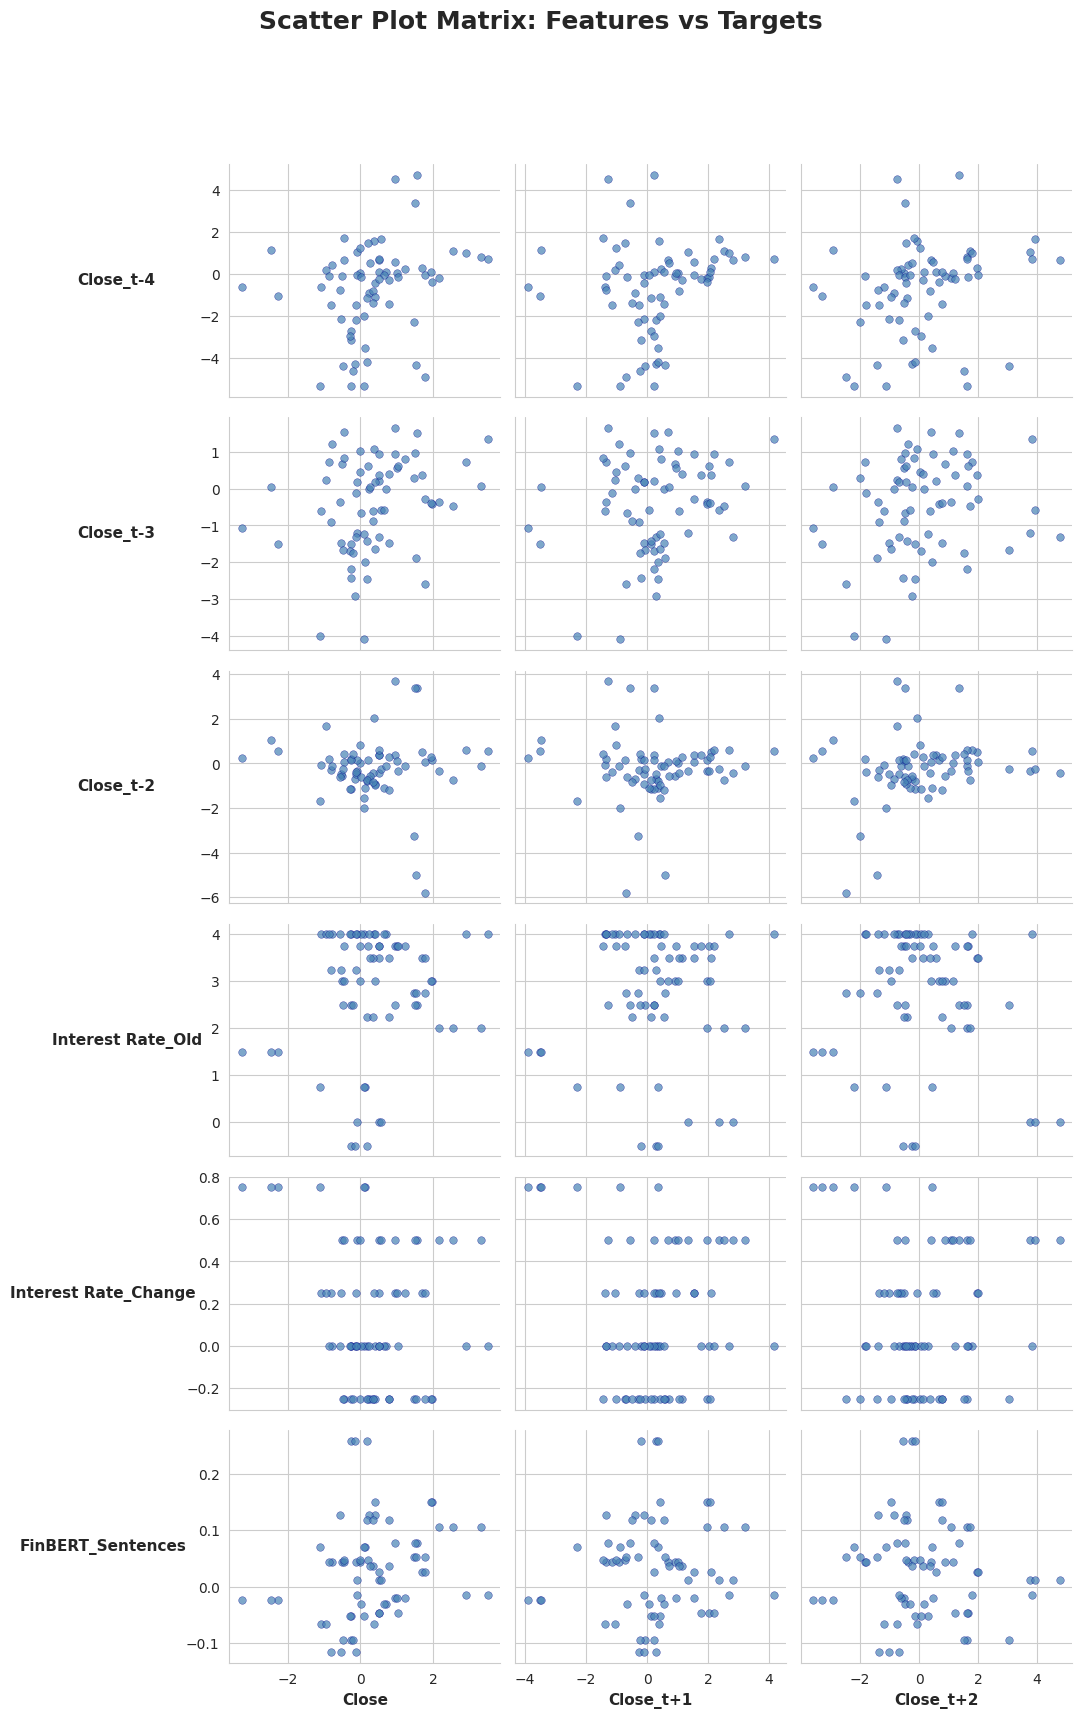

In [78]:
#Pairplot Dataset
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Create directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# === SELECT XS MODE ===
XS = True  # Set to False for the "normal" (non-XS) plot

# === CONFIGURATIONS ===
config_XS = {
    'x_indices': [6, 7, 8],              # Column indices for X-axis (Targets)
    'y_indices': list(range(0, 6)),      # Column indices for Y-axis (Features)
    'excluded_columns': [
        'FinBERT_Chunks',
        'RoBERTa_Sentences', 
        'RoBERTa_Chunks'
    ],
    'height': 2.8,
    'aspect': 1.3,
    'scatter_kws': {
        's': 30,
        'alpha': 0.7,
        'color': 'steelblue',
        'edgecolor': 'darkblue',
        'linewidth': 0.3
    },
    'style': 'whitegrid',
    'title_fontsize': 18,
    'label_fontsize': 11,
    'file_suffix': '_XS'
}

config_normal = {
    'x_indices': [9, 10, 11],            # Column indices for X-axis (Targets)
    'y_indices': list(range(0, 9)),      # Column indices for Y-axis (Features)
    'excluded_columns': [],              # No excluded columns in normal mode
    'height': 2.8,
    'aspect': 1.3,
    'scatter_kws': {
        's': 30,
        'alpha': 0.7,
        'color': 'steelblue',
        'edgecolor': 'darkblue',
        'linewidth': 0.3
    },
    'style': 'whitegrid',
    'title_fontsize': 18,
    'label_fontsize': 11,
    'file_suffix': ''
}

# Select config and file suffix
config = config_XS if XS else config_normal
file_suffix = config['file_suffix']

# === DATA PREPARATION ===
# Remove MDAX/SDAX index columns
df = df_data.loc[:, ~df_data.columns.str.startswith('Index_')]

# Remove excluded columns if any
if config['excluded_columns']:
    df = df.loc[:, ~df.columns.isin(config['excluded_columns'])]

# Get column names for configured indices
columns_all = list(df.columns)
x_cols = [columns_all[i] for i in config['x_indices'] if i < len(columns_all)]
y_cols = [columns_all[i] for i in config['y_indices'] if i < len(columns_all)]

# Create subset and drop NA
df_subset = df[x_cols + y_cols].dropna()

# === PLOTTING ===
sns.set_style(config['style'])
g = sns.PairGrid(
    df_subset,
    x_vars=x_cols,
    y_vars=y_cols,
    height=config['height'],
    aspect=config['aspect']
)

g.map(sns.scatterplot, **config['scatter_kws'])

# Enhance axis labels
for ax, feature in zip(g.axes.flatten()[::len(x_cols)], y_cols):
    ax.set_ylabel(feature, rotation=0, labelpad=60, va='center', 
                  fontsize=config['label_fontsize'], fontweight='bold')

for ax, target in zip(g.axes[-1], x_cols):
    ax.set_xlabel(target, fontsize=config['label_fontsize'], fontweight='bold')

plt.suptitle('Scatter Plot Matrix: Features vs Targets', 
             fontsize=config['title_fontsize'], fontweight='bold', y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save with white background
plt.savefig(f'/kaggle/working/scatter_plot_matrix_white{file_suffix}.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig(f'/kaggle/working/scatter_plot_matrix_transparent{file_suffix}.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


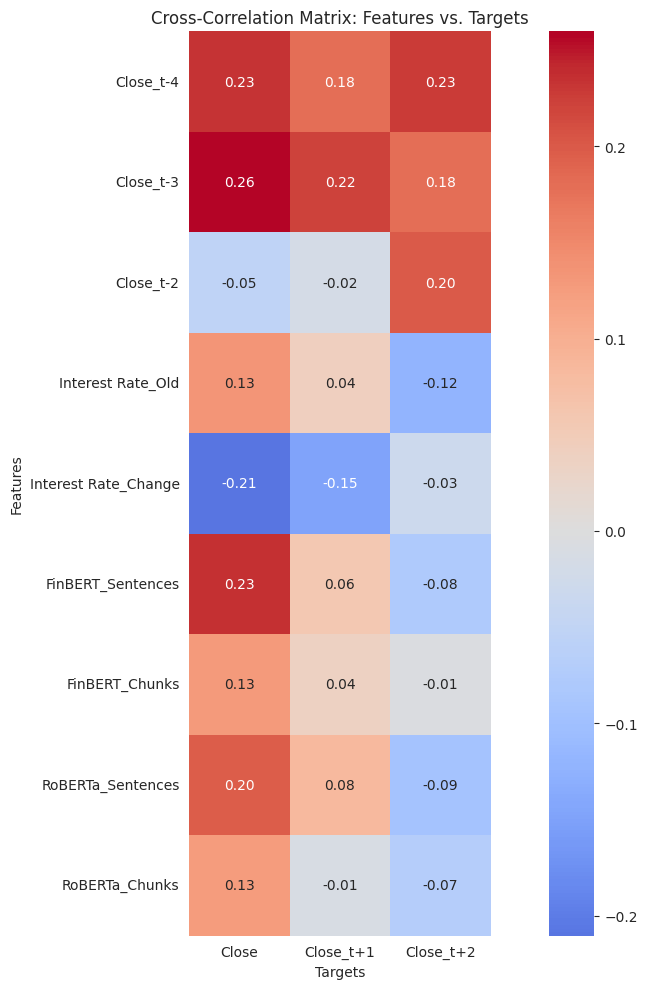

In [35]:
#HEAATMAP XS
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# === CONFIGURATION ===
config = {
    # Define the indices of columns (without 'Index_MDAX'/'Index_SDAX') 
    # to be displayed on X and Y axes:
    'x_indices': [9,10,11],         # e.g. columns 9, 10, 11 on X-axis
    'y_indices': [0,1,2,3,4,5,6,7,8],    # e.g. columns 0-8 on Y-axis
    'figsize': (12, 10),
    'cmap': 'coolwarm',
    'annot': True,
    'fmt': '.2f',
    'center': 0,
    'square': True
}

# 1. Original DataFrame without MDAX/SDAX index columns
df = df_data.loc[:, ~df_data.columns.str.startswith('Index_')]

# 2. Complete column list
columns_all = list(df.columns)

# 3. Get column names for configured indices
x_cols = [columns_all[i] for i in config['x_indices'] if i < len(columns_all)]
y_cols = [columns_all[i] for i in config['y_indices'] if i < len(columns_all)]

# 4. Create subset and calculate correlation
df_subset = df[x_cols + y_cols].dropna()
corr_matrix = df_subset.corr()
# Only cross-correlation Y vs. X
corr_xy = corr_matrix.loc[y_cols, x_cols]

# 5. Plot
plt.figure(figsize=config['figsize'])
sns.heatmap(
    corr_xy,
    annot=config['annot'],
    cmap=config['cmap'],
    center=config['center'],
    square=config['square'],
    fmt=config['fmt']
)
plt.xlabel("Targets")
plt.ylabel("Features")
plt.title("Cross-Correlation Matrix: Features vs. Targets")
plt.tight_layout()

# Save as PNG for download
plt.savefig('/kaggle/working/cross_correlation_heatmap.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')


# Save with transparent background
plt.savefig('/kaggle/working/cross_correlation_heatmap_transparent.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()



# Train/Test Split

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tabulate import tabulate

# Configuration for train/test split
config = {
    'use_fixed_testset': False,
    'test_size': 15,
    'random_state': 33,
    'fixed_test_dates': [
        '2024-01-25',
        '2023-05-04',
        '2023-02-02',
        '2025-03-06',
        '2024-10-17'
    ]
}

# Train/test split logic (based on df_base)
if config['use_fixed_testset']:
    test_dates = pd.to_datetime(config['fixed_test_dates'])
    test_indices = df_base.index.isin(test_dates)
    train_indices = ~test_indices
else:
    np.random.seed(config['random_state'])
    unique_dates = df_base.index.normalize().unique()
    n_dates = config['test_size'] // 3

    dates_zero = []
    dates_positive = []
    dates_negative = []

    for date in unique_dates:
        values = df_base.loc[df_base.index.normalize() == date, 'Interest Rate_Change']
        if (values == 0.00).any():
            dates_zero.append(date)
        if (values > 0.00).any():
            dates_positive.append(date)
        if (values < 0.00).any():
            dates_negative.append(date)

    selected_dates = []
    selected_dates.append(np.random.choice(dates_zero))
    selected_dates.append(np.random.choice(dates_positive))
    selected_dates.append(np.random.choice(dates_negative))

    remaining = [d for d in unique_dates if d not in selected_dates]
    if n_dates > 3:
        additional = np.random.choice(remaining, size=n_dates-3, replace=False)
        selected_dates.extend(additional)

    test_indices = df_base.index.normalize().isin(selected_dates)
    train_indices = ~test_indices

# Only split base and fin_sen DataFrames
train_set = df_base.loc[train_indices]
test_set = df_base.loc[test_indices]

train_fin_sen = df_fin_sen.loc[train_indices]
test_fin_sen = df_fin_sen.loc[test_indices]

# Output the shapes
datasets_shapes = [
    ('base', train_set, test_set),
    ('fin_sen', train_fin_sen, test_fin_sen)
]

for name, train, test in datasets_shapes:
    print(f"{name} - Train-Set Shape: {train.shape}")
    print(f"{name} - Test-Set  Shape: {test.shape}")

# ------------------------------------------------------------------------
# Compact, redundancy-free summary and metrics for both datasets

datasets = {
    'base': {'Train': train_set, 'Test': test_set},
    'fin_sen': {'Train': train_fin_sen, 'Test': test_fin_sen}
}

targets = ['Close', 'Close_t+1', 'Close_t+2']
ir = 'Interest Rate_Change'

for label, splits in datasets.items():
    # 1) Summary: Instances & Interest Rate_Change
    summary_rows = []
    for metric in ['Instances', ir]:
        row = []
        for df in splits.values():
            if metric == 'Instances':
                row.append(len(df))
            else:
                row.append(f"{df[ir].gt(0).mean()*100:.1f}% ({df[ir].lt(0).mean()*100:.1f}%)")
        summary_rows.append(row)
    summary = pd.DataFrame(summary_rows, index=['Instances', ir], columns=splits.keys())

    # 2) Metrics for target variables (fully generic)
    metric_names = ['Mean', 'Std', '% Positive', '% Negative']
    metric_funcs = [
        lambda df, t: f"{df[t].mean():.4f}",
        lambda df, t: f"{df[t].std():.4f}",
        lambda df, t: f"{df[t].gt(0).mean()*100:.1f}%",
        lambda df, t: f"{df[t].le(0).mean()*100:.1f}%"
    ]
    metrics_dict = {}
    for t in targets:
        values = []
        for func in metric_funcs:
            vals = [func(df, t) for df in splits.values()]
            values.append(f"{vals[0]} [{vals[1]}]")
        metrics_dict[t] = values
    metrics = pd.DataFrame(metrics_dict, index=metric_names)

    # 3) Output
    print(f"\n=== {label.upper()} DATASET ===\n")
    print(tabulate(summary.reset_index().values,
                   headers=["", *splits.keys()],
                   tablefmt="github", stralign="center", numalign="center"))
    print("\n" * 3, end="")
    print(tabulate(metrics.reset_index().values,
                   headers=["", *targets],
                   tablefmt="github", stralign="center", numalign="center"))
    print("\n" * 2, end="")


base - Train-Set Shape: (54, 10)
base - Test-Set  Shape: (15, 10)
fin_sen - Train-Set Shape: (54, 11)
fin_sen - Test-Set  Shape: (15, 11)

=== BASE DATASET ===

|                      |     Train     |     Test      |
|----------------------|---------------|---------------|
|      Instances       |      54       |      15       |
| Interest Rate_Change | 44.4% (22.2%) | 40.0% (40.0%) |



|            |      Close      |    Close_t+1     |    Close_t+2     |
|------------|-----------------|------------------|------------------|
|    Mean    | 0.2847 [0.6615] | 0.3467 [-0.0181] | 0.2602 [-0.4431] |
|    Std     | 1.2676 [0.9443] | 1.5951 [1.1599]  | 1.6865 [1.3372]  |
| % Positive |  59.3% [66.7%]  |  63.0% [46.7%]   |  50.0% [33.3%]   |
| % Negative |  40.7% [33.3%]  |  37.0% [53.3%]   |  50.0% [66.7%]   |



=== FIN_SEN DATASET ===

|                      |     Train     |     Test      |
|----------------------|---------------|---------------|
|      Instances       |      54       |

# Display Train/Testset

In [65]:
print("Train-Set:")
display(train_fin_sen)

print("\nTest-Set:")
display(test_fin_sen)


Train-Set:


,Close_t-4,Close_t-3,Close_t-2,Index_MDAX,Index_SDAX,Interest Rate_Old,Interest Rate_Change,FinBERT_Sentences,Close,Close_t+1,Close_t+2
Date,,,,,,,,,,,
2022-07-21,-3.141550,-2.425617,0.198991,0.0,0.0,-0.50,0.00,0.260,-0.266075,-0.213071,-0.539528
2022-07-21,-4.265666,-2.903723,-0.677581,1.0,0.0,-0.50,0.00,0.260,-0.150470,0.299553,-0.238834
2022-07-21,-4.213593,-2.455096,-0.800936,0.0,1.0,-0.50,0.00,0.260,0.188718,0.348937,-0.145770
2022-09-08,1.039798,-1.201536,-0.344767,0.0,0.0,0.00,0.50,0.012,-0.090198,1.333543,3.765106
2022-09-08,0.663098,-1.308234,-0.444066,1.0,0.0,0.00,0.50,0.012,0.519197,2.818977,4.762705
2022-09-08,1.638908,-0.569039,-0.249987,0.0,1.0,0.00,0.50,0.012,0.562792,2.367045,3.941081
2022-10-27,-3.523164,-2.003363,-1.082541,0.0,0.0,0.75,0.75,0.070,0.116855,0.360114,0.439003
2022-10-27,-5.343556,-4.006108,-1.671129,1.0,0.0,0.75,0.75,0.070,-1.118959,-2.315443,-2.204423
2022-10-27,-5.330521,-4.097239,-1.977422,0.0,1.0,0.75,0.75,0.070,0.104102,-0.893722,-1.123045



Test-Set:


,Close_t-4,Close_t-3,Close_t-2,Index_MDAX,Index_SDAX,Interest Rate_Old,Interest Rate_Change,FinBERT_Sentences,Close,Close_t+1,Close_t+2
Date,,,,,,,,,,,
2023-07-27,0.283669,0.368782,0.496731,0.0,0.0,3.50,0.25,0.026,1.702078,2.097082,1.955000
2023-07-27,-0.078090,-0.269530,0.077807,1.0,0.0,3.50,0.25,0.026,1.785418,1.524412,1.987185
2023-07-27,0.101251,0.197088,0.359499,0.0,1.0,3.50,0.25,0.026,0.500695,0.228546,0.556807
2023-09-14,0.551104,0.938800,0.392870,0.0,0.0,3.75,0.25,-0.021,0.966269,1.529957,0.466909
2023-09-14,0.017334,0.549010,0.125370,1.0,0.0,3.75,0.25,-0.021,0.998117,0.961341,-0.520588
2023-09-14,0.242864,0.804311,-0.106220,0.0,1.0,3.75,0.25,-0.021,1.235321,0.447257,-0.613790
2024-04-11,0.429567,1.224879,-0.113884,0.0,0.0,4.00,0.00,0.044,-0.789178,-0.922679,-0.390777
2024-04-11,-0.092168,0.730216,0.194915,1.0,0.0,4.00,0.00,0.044,-0.878917,-1.347923,-1.829327
2024-04-11,-1.462324,-0.129219,-0.402328,0.0,1.0,4.00,0.00,0.044,-0.113721,-1.167655,-1.790262


# Visualizations Train/Test

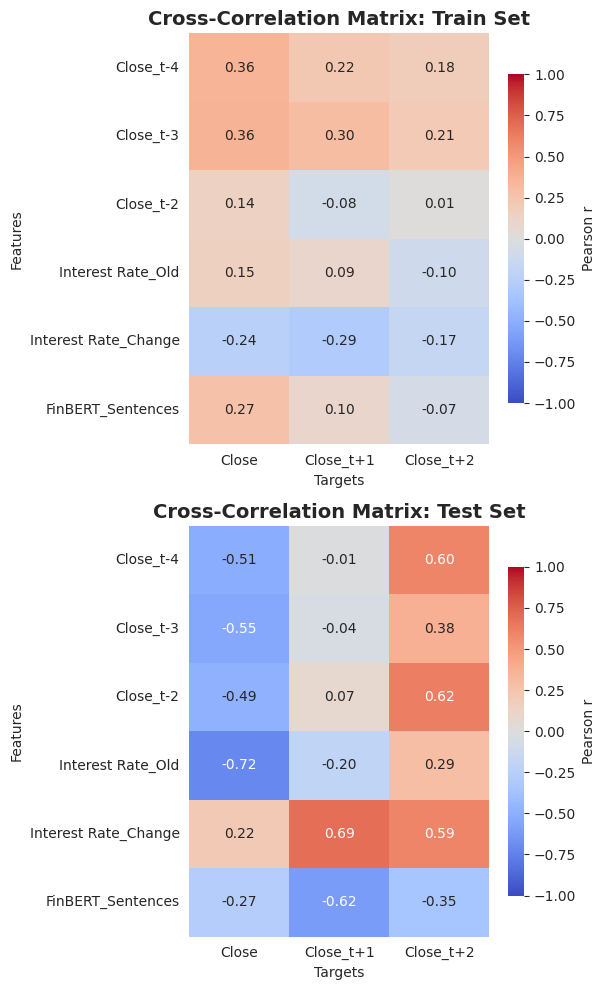

In [70]:
#Cross Correlation Matrix
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Create directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# === CONFIGURATION ===
config = {
    'x_indices': [6,7,8],  # Column indices for X-axis (Targets)
    'y_indices': [0, 1, 2, 3, 4,5],  # Column indices for Y-axis (Features)
    'x_label': 'Targets',
    'y_label': 'Features',
    'size': 0.5,  # Scale factor for figsize, 1.0 = 100%
    'cmap': 'coolwarm',
    'annot': True,
    'fmt': '.2f',
    'vmin': -1,
    'vmax': 1,
    'side_by_side': False  # True for side-by-side, False for top-bottom
}

# Set default figsize based on layout
if config['side_by_side']:
    base_figsize = (20, 8)
else:
    base_figsize = (12,10)

# Scale figsize by 'size' factor
figsize = (base_figsize[0] * config['size'], base_figsize[1] * config['size'])

# Set layout suffix and filenames based on layout
layout_suffix = 'sidebyside' if config['side_by_side'] else 'topandbottom'
white_bg_filename = f'/kaggle/working/cross_correlation_heatmap_white_XS_traintest_{layout_suffix}.png'
transparent_bg_filename = f'/kaggle/working/cross_correlation_heatmap_transparent_XS_traintest_{layout_suffix}.png'

# Process train and test sets
datasets = {'Train Set': train_fin_sen, 'Test Set': test_fin_sen}

# Set subplot layout according to config
if config['side_by_side']:
    fig, axes = plt.subplots(1, 2, figsize=figsize)
else:
    # Double the height for top-bottom layout
    fig, axes = plt.subplots(2, 1, figsize=(figsize[0], figsize[1]*2))

for ax, (name, dataset) in zip(axes, datasets.items()):
    # 1. Original DataFrame without MDAX/SDAX index columns
    df = dataset.loc[:, ~dataset.columns.str.startswith('Index_')]
    
    # 2. Complete column list
    columns_all = list(df.columns)
    
    # 3. Get column names for configured indices
    x_cols = [columns_all[i] for i in config['x_indices'] if i < len(columns_all)]
    y_cols = [columns_all[i] for i in config['y_indices'] if i < len(columns_all)]
    
    # 4. Create subset and calculate correlation
    df_subset = df[x_cols + y_cols].dropna()
    corr_matrix = df_subset.corr()
    # Only cross-correlation Y vs. X
    corr_xy = corr_matrix.loc[y_cols, x_cols]

    # 5. Plot
    sns.heatmap(
        corr_xy,
        annot=config['annot'],
        cmap=config['cmap'],
        vmin=config['vmin'], 
        vmax=config['vmax'],
        square=False,
        fmt=config['fmt'],
        cbar_kws={'shrink': 0.8, 'label': 'Pearson r'},
        ax=ax
    )
    ax.set_xlabel(config['x_label'])
    ax.set_ylabel(config['y_label'])
    ax.set_title(f"Cross-Correlation Matrix: {name}", fontsize=14, fontweight='bold')

plt.tight_layout()

# Save as PNG for download
plt.savefig(white_bg_filename, dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig(transparent_bg_filename, dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()


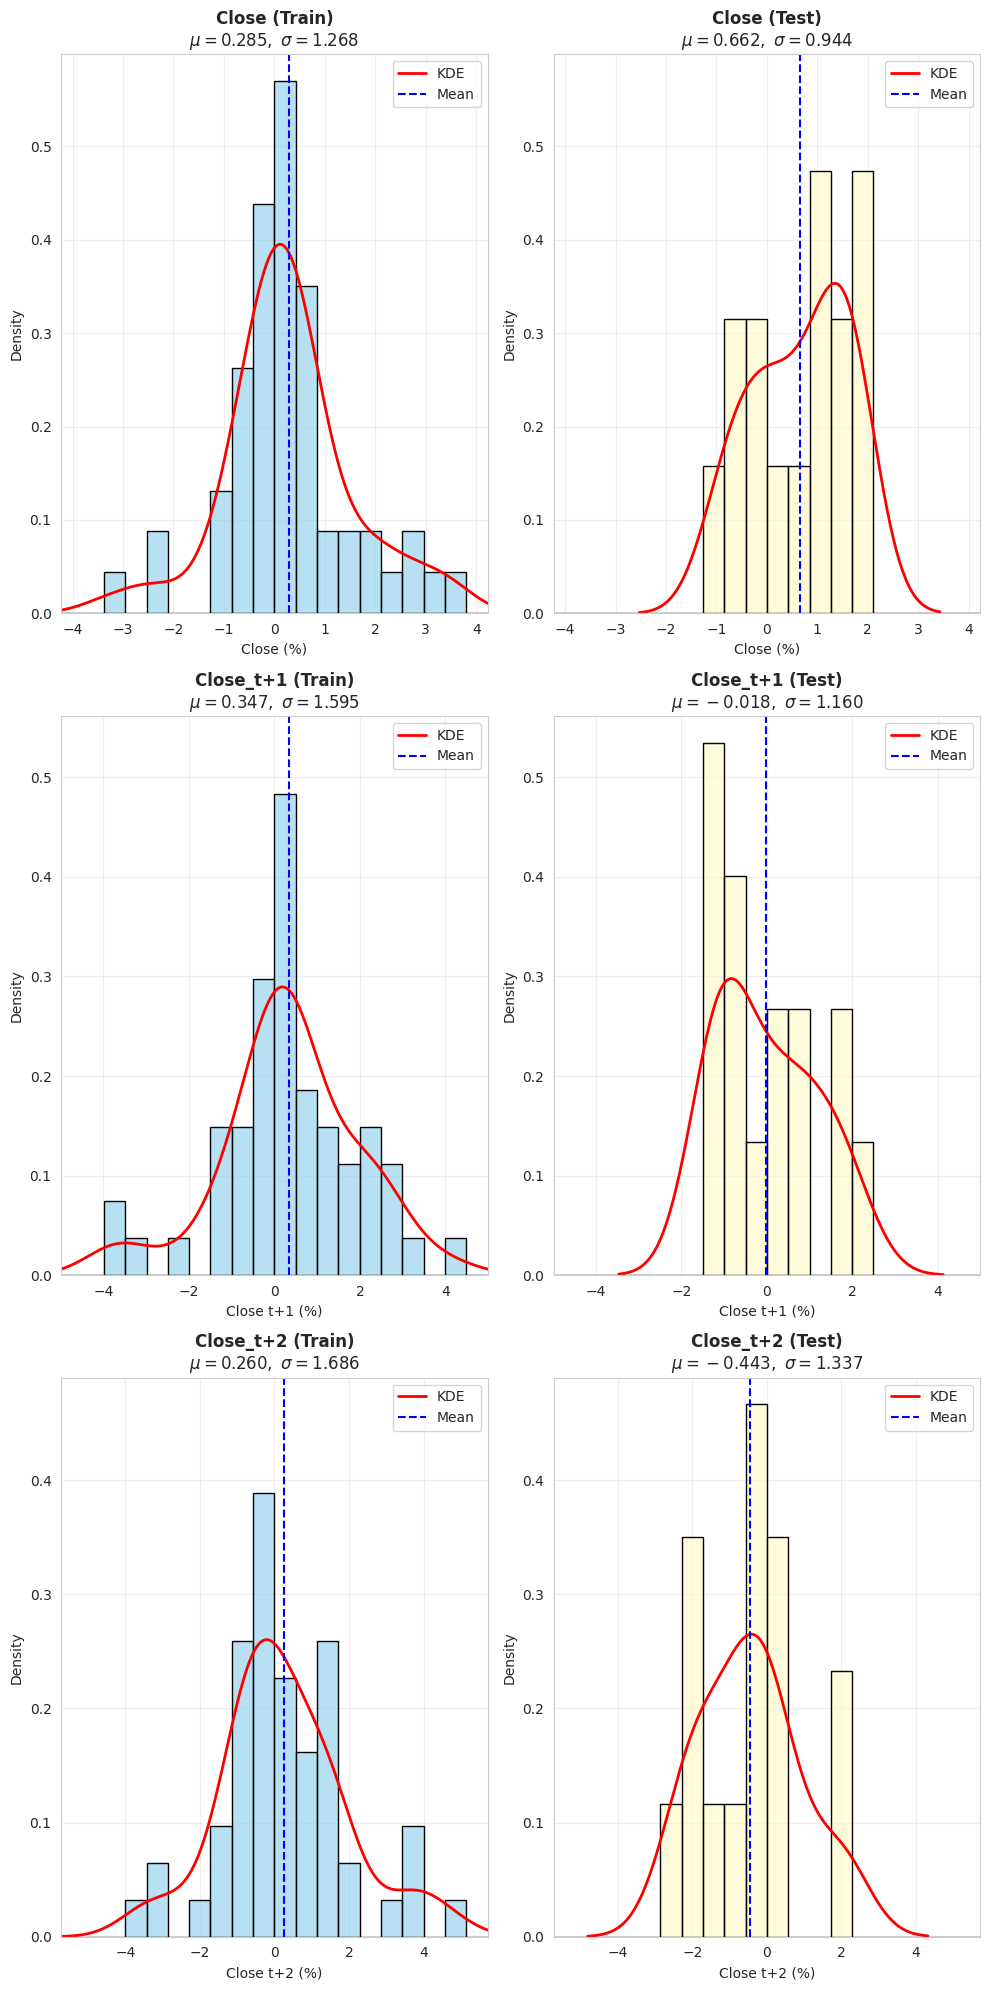

In [72]:
#Distribution Plots
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

# Create directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Configuration
config = {
    'fig_scale': 1.0,  # Scale factor for figure size
    'y_label': 'Density',  # Label for y-axis
    'x_labels': {  # X-axis labels for each target variable
        'Close': 'Close (%)',
        'Close_t+1': 'Close t+1 (%)',
        'Close_t+2': 'Close t+2 (%)'
    },
    'x_pad': 0.20  # 20% padding for x-axis range
}

# Figure size
fig_width  = 10 * config['fig_scale']
fig_height = 20 * config['fig_scale']

# Target columns
target_cols = ['Close', 'Close_t+1', 'Close_t+2']

# Get all common features except those starting with 'Index_' and target variables
common_feats = set(train_set.columns).intersection(test_set.columns)
features = sorted([
    c for c in common_feats
    if not c.startswith('Index_') and c not in target_cols
])

# Set up a 3x2 grid: columns 0 and 1 for histograms + KDE for Train and Test
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(fig_width, fig_height))

# Colors and labels for train and test
colors = ['skyblue', '#FFF9C4']
splits = ['Train', 'Test']

for i, col in enumerate(target_cols):
    data = [train_set[col].dropna(), test_set[col].dropna()]

    # Symmetric x-axis range around 0 with padding
    max_abs = max(data[0].abs().max(), data[1].abs().max()) * (1 + config['x_pad'])
    bins = np.linspace(-max_abs, max_abs, 21)

    # Y max from histogram densities
    dens_tr, _ = np.histogram(data[0], bins=bins, density=True)
    dens_te, _ = np.histogram(data[1], bins=bins, density=True)
    y_max = max(dens_tr.max(), dens_te.max()) * 1.05

    # Plot for both Train and Test
    for j in range(2):
        ax = axes[i, j]
        sns.histplot(data[j], bins=bins, stat='density', kde=False,
                     color=colors[j], edgecolor='black', alpha=0.6, ax=ax)
        sns.kdeplot(data[j], color='red', linewidth=2, ax=ax, label='KDE')
        m, s = data[j].mean(), data[j].std(ddof=1)
        ax.axvline(m, color='blue', linestyle='--', linewidth=1.5, label='Mean')
        ax.set_xlim(-max_abs, max_abs)
        ax.set_ylim(0, y_max)
        ax.set_title(f'{col} ({splits[j]})\n$\mu={m:.3f},\ \sigma={s:.3f}$', fontweight='bold')
        ax.set_xlabel(config['x_labels'][col])
        ax.set_ylabel(config['y_label'])
        ax.legend()
        ax.grid(alpha=0.3)

plt.tight_layout()

# Save with white background
plt.savefig('/kaggle/working/target_distributions_white.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig('/kaggle/working/target_distributions_transparent.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()


## Not Used Visualizations

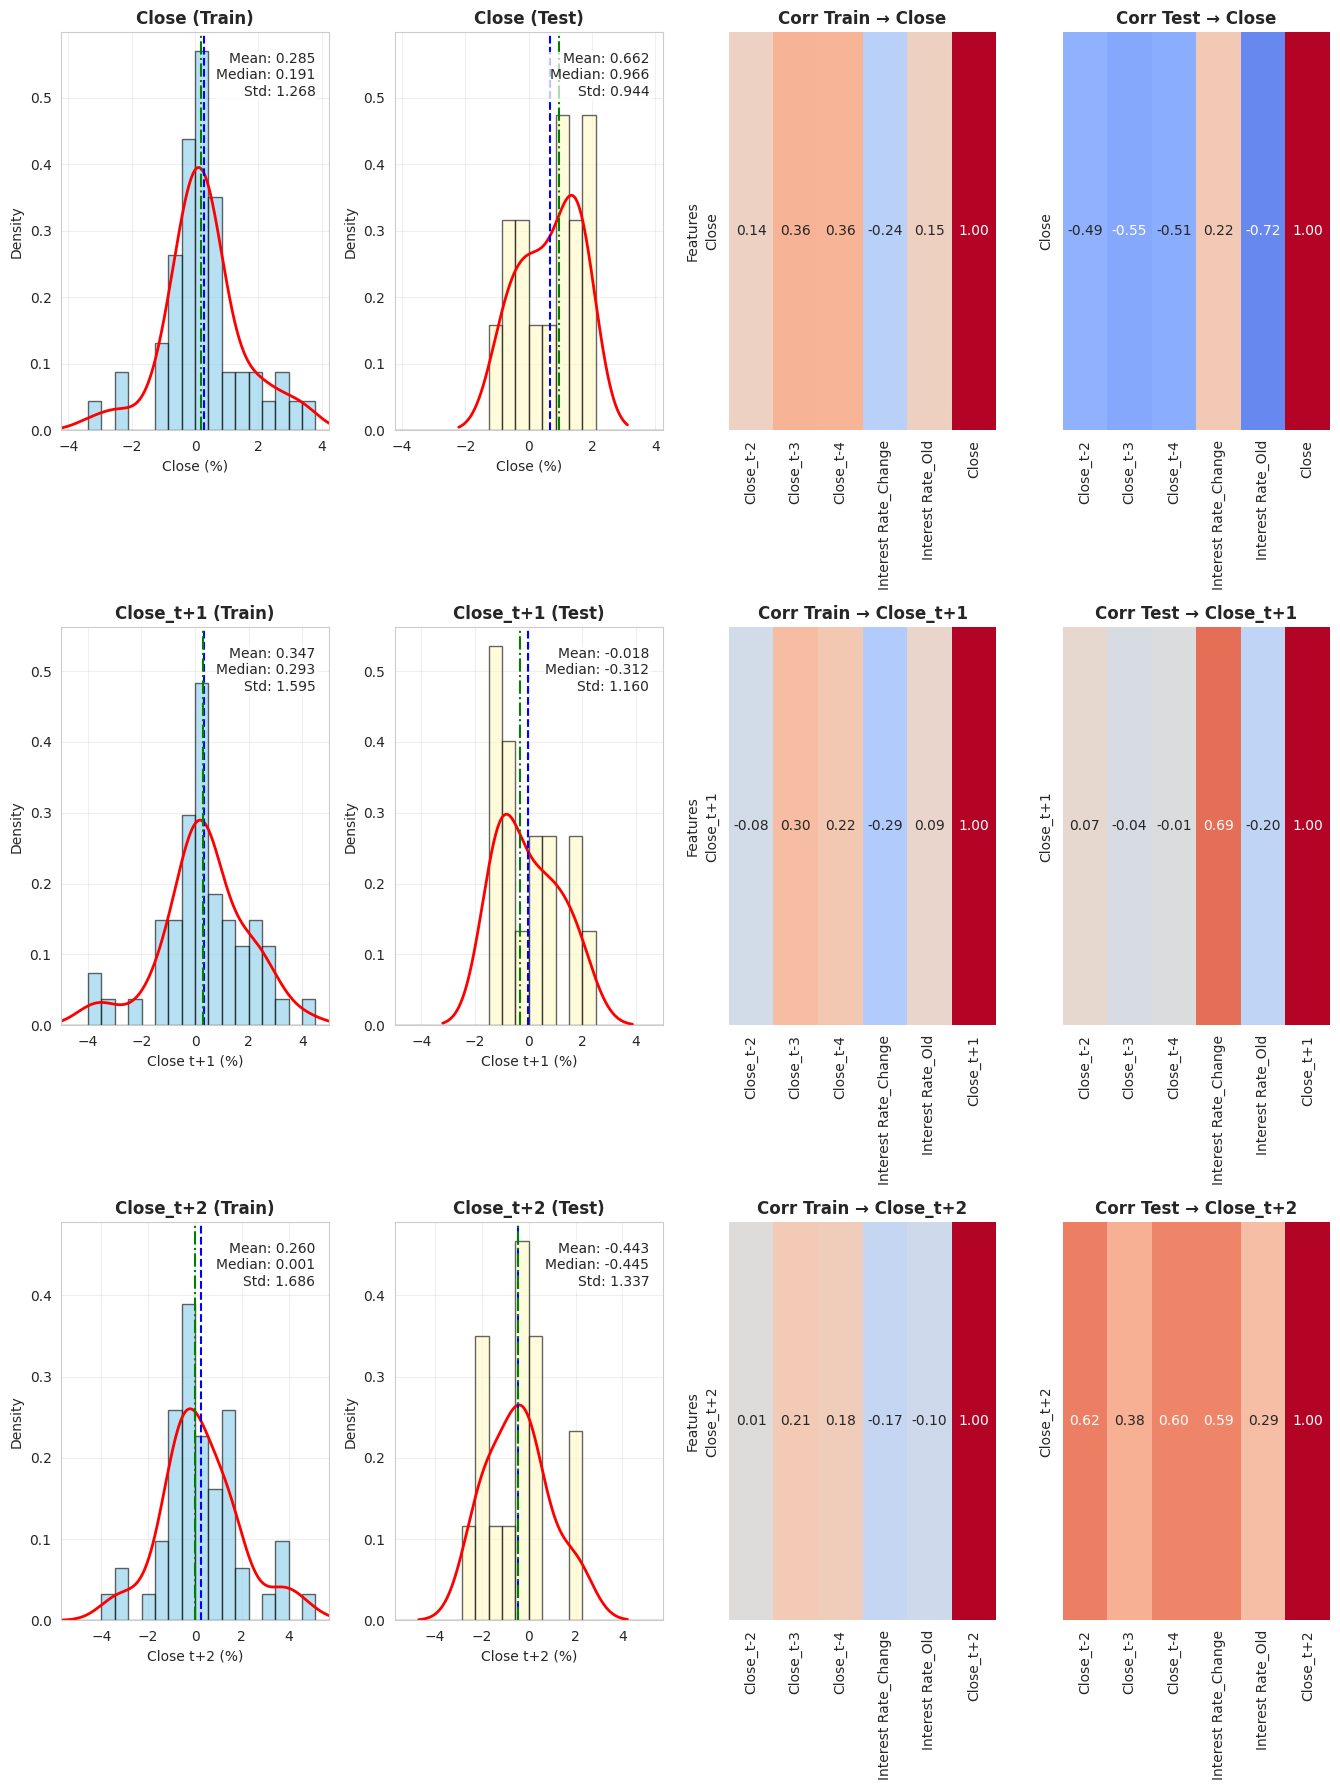

In [20]:
##Not used
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Configuration
config = {
    'fig_scale': 0.9,
    'y_label'  : 'Density',
    'x_labels' : {
        'Close'    : 'Close (%)',
        'Close_t+1': 'Close t+1 (%)',
        'Close_t+2': 'Close t+2 (%)'
    },
    'x_pad': 0.20  # 10% Spielraum
}

# Figurengröße
fig_width, fig_height = 15 * config['fig_scale'], 20 * config['fig_scale']
target_cols = ['Close', 'Close_t+1', 'Close_t+2']

# Schnittmenge der Spalten in Train und Test
common_feats = set(train_set.columns).intersection(test_set.columns)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(fig_width, fig_height))

for i, col in enumerate(target_cols):
    # Für alle Features: entferne Index_*-Spalten und alle drei Zielvariablen
    features = sorted([
        c for c in common_feats
        if not c.startswith('Index_') and c not in target_cols
    ])

    data_tr = train_set[col].dropna()
    data_te = test_set[col].dropna()

    # X-Bereich symmetrisch um 0 mit Puffer
    max_abs = max(data_tr.abs().max(), data_te.abs().max()) * (1 + config['x_pad'])
    bins    = np.linspace(-max_abs, max_abs, 21)

    # Y-Max aus Histogrammdichten
    dens_tr, _ = np.histogram(data_tr, bins=bins, density=True)
    dens_te, _ = np.histogram(data_te, bins=bins, density=True)
    y_max = max(dens_tr.max(), dens_te.max()) * 1.05

    # Spalten 0 & 1: Histogramm + KDE für Train/Test
    for j, ds in enumerate((data_tr, data_te)):
        ax = axes[i, j]
        color = 'skyblue' if j == 0 else '#FFF9C4'
        ax.hist(ds, bins=bins, density=True, alpha=0.6, color=color, edgecolor='black')
        ds.plot.kde(ax=ax, color='red', linewidth=2)
        m, med, s = ds.mean(), ds.median(), ds.std(ddof=1)
        ax.axvline(m,   color='blue',  linestyle='--', linewidth=1.5)
        ax.axvline(med, color='green', linestyle='-.', linewidth=1.5)
        ax.set_xlim(-max_abs, max_abs)
        ax.set_ylim(0, y_max)
        split = 'Train' if j == 0 else 'Test'
        ax.set_title(f'{col} ({split})', fontweight='bold')
        ax.set_xlabel(config['x_labels'][col])
        ax.set_ylabel(config['y_label'])
        ax.text(
            0.95, 0.95,
            f"Mean: {m:.3f}\nMedian: {med:.3f}\nStd: {s:.3f}",
            transform=ax.transAxes,
            ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.7, pad=0.3)
        )
        ax.grid(alpha=0.3)

    # Spalte 2: Korrelations-Heatmap für Train-Set
    ax_tr = axes[i, 2]
    corr_tr = train_set[features + [col]].corr()[[col]].T
    sns.heatmap(
        corr_tr,
        annot=True, fmt='.2f',
        cmap='coolwarm', vmin=-1, vmax=1,
        cbar=False, ax=ax_tr
    )
    ax_tr.set_title(f'Corr Train → {col}', fontweight='bold')
    ax_tr.set_xlabel(''); ax_tr.set_ylabel('Features')

    # Spalte 3: Korrelations-Heatmap für Test-Set
    ax_te = axes[i, 3]
    corr_te = test_set[features + [col]].corr()[[col]].T
    sns.heatmap(
        corr_te,
        annot=True, fmt='.2f',
        cmap='coolwarm', vmin=-1, vmax=1,
        cbar=False, ax=ax_te
    )
    ax_te.set_title(f'Corr Test → {col}', fontweight='bold')
    ax_te.set_xlabel(''); ax_te.set_ylabel('')

plt.tight_layout()
plt.show()


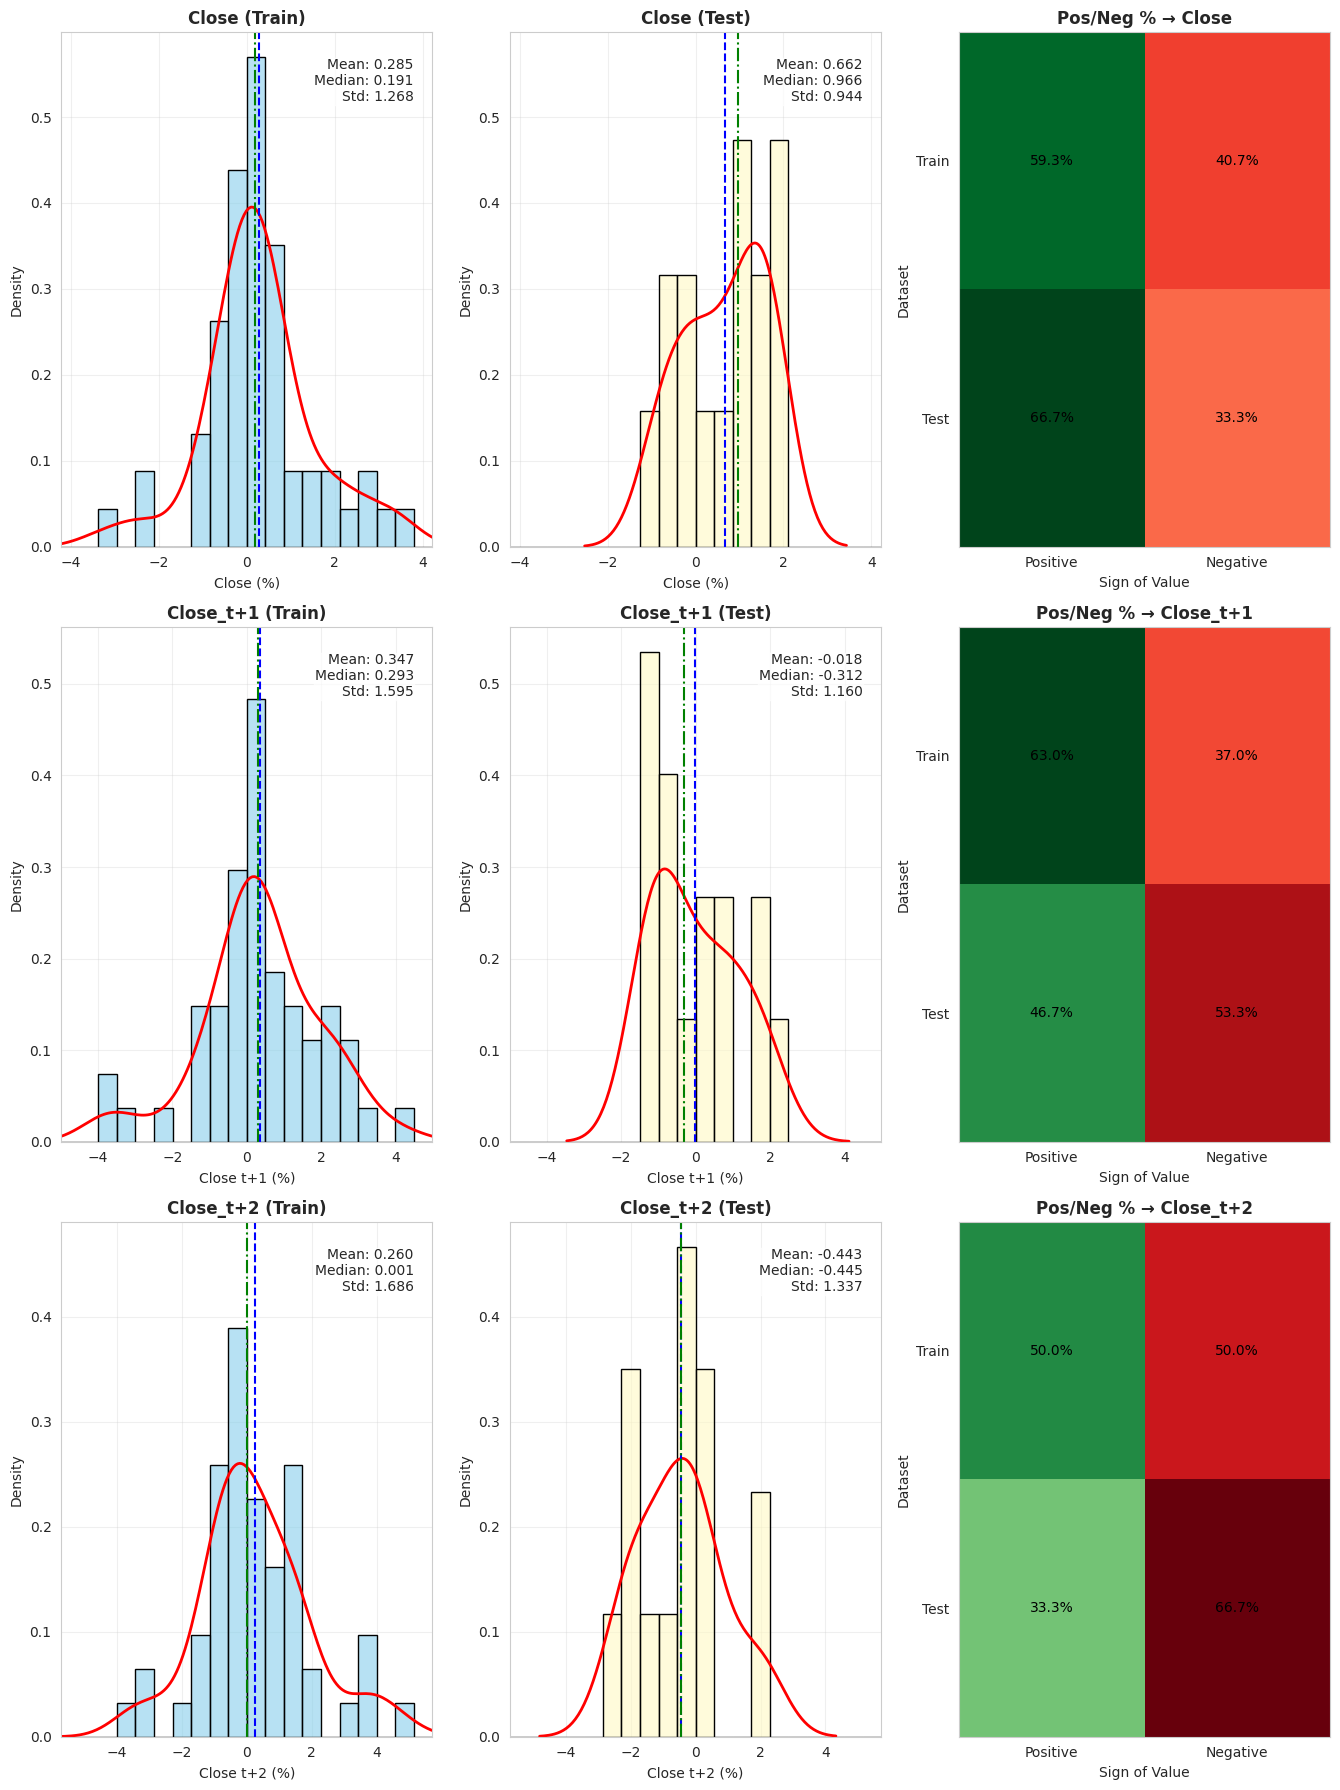

In [21]:
#Not used
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Configuration
config = {
    'fig_scale': 0.9,
    'y_label': 'Density',
    'x_labels': {
        'Close': 'Close (%)',
        'Close_t+1': 'Close t+1 (%)',
        'Close_t+2': 'Close t+2 (%)'
    },
    'x_pad': 0.20  # 10% Puffer um den Max-Absolutwert
}

# Figurengröße
fig_width  = 15 * config['fig_scale']
fig_height = 20 * config['fig_scale']

# Zielvariablen
target_cols = ['Close', 'Close_t+1', 'Close_t+2']

# Schnapp dir alle gemeinsamen Features außer Index_*-Spalten und Zielvariablen
common_feats = set(train_set.columns).intersection(test_set.columns)
features = sorted([
    c for c in common_feats
    if not c.startswith('Index_') and c not in target_cols
])

# Setup 3×3 Grid: Spalten 0+1 = Hist+KDE, Spalte 2 = Pos/Neg-Heatmap in %
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(fig_width, fig_height))

for i, col in enumerate(target_cols):
    data_tr = train_set[col].dropna()
    data_te = test_set[col].dropna()

    # X-Bereich symmetrisch um 0 mit Puffer
    max_abs = max(data_tr.abs().max(), data_te.abs().max()) * (1 + config['x_pad'])
    bins = np.linspace(-max_abs, max_abs, 21)

    # Y-Max aus Histogrammdichten
    dens_tr, _ = np.histogram(data_tr, bins=bins, density=True)
    dens_te, _ = np.histogram(data_te, bins=bins, density=True)
    y_max = max(dens_tr.max(), dens_te.max()) * 1.05

    # Spalten 0+1: Histogramm + KDE für Train/Test
    for j, ds in enumerate((data_tr, data_te)):
        ax = axes[i, j]
        color = 'skyblue' if j == 0 else '#FFF9C4'
        sns.histplot(ds, bins=bins, stat='density', kde=False,
                     color=color, edgecolor='black', alpha=0.6, ax=ax)
        sns.kdeplot(ds, color='red', linewidth=2, ax=ax)

        m, med, s = ds.mean(), ds.median(), ds.std(ddof=1)
        ax.axvline(m, color='blue', linestyle='--', linewidth=1.5)
        ax.axvline(med, color='green', linestyle='-.', linewidth=1.5)

        ax.set_xlim(-max_abs, max_abs)
        ax.set_ylim(0, y_max)

        split = 'Train' if j == 0 else 'Test'
        ax.set_title(f'{col} ({split})', fontweight='bold')
        ax.set_xlabel(config['x_labels'][col])
        ax.set_ylabel(config['y_label'])
        ax.text(
            0.95, 0.95,
            f"Mean: {m:.3f}\nMedian: {med:.3f}\nStd: {s:.3f}",
            transform=ax.transAxes, ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.7, pad=0.3)
        )
        ax.grid(alpha=0.3)

    # Spalte 2: Pos/Neg Heatmap in % (je Zeile auf 100% normiert)
    ax_heat = axes[i, 2]
    tr_total = len(data_tr)
    te_total = len(data_te)
    percent_df = pd.DataFrame({
        'Positive (%)': [data_tr.gt(0).sum() / tr_total * 100,
                         data_te.gt(0).sum() / te_total * 100],
        'Negative (%)': [data_tr.le(0).sum() / tr_total * 100,
                         data_te.le(0).sum() / te_total * 100]
    }, index=['Train', 'Test'])

    # Heatmap mit getrennter Grün/Rot-Skala über Spalten
    # Wir bauen ein 2×2 Farbarray manuell:
    max_pct = percent_df.values.max() / 100.0
    colors = np.zeros((2, 2, 4))
    for r in range(2):
        for c, col_name in enumerate(percent_df.columns):
            val = percent_df.iloc[r, c] / 100.0 / max_pct
            if 'Positive' in col_name:
                colors[r, c] = plt.cm.Greens(val)
            else:
                colors[r, c] = plt.cm.Reds(val)

    ax_heat.imshow(colors, aspect='auto')
    for (r, c), txt in np.ndenumerate(percent_df.values):
        ax_heat.text(c, r, f"{txt:.1f}%", ha='center', va='center',
                     color='black', fontsize=10)

    ax_heat.set_xticks([0, 1])
    ax_heat.set_xticklabels(['Positive', 'Negative'])
    ax_heat.set_yticks([0, 1])
    ax_heat.set_yticklabels(['Train', 'Test'])
    ax_heat.set_title(f'Pos/Neg % → {col}', fontweight='bold')
    ax_heat.set_xlabel('Sign of Value')
    ax_heat.set_ylabel('Dataset')
    ax_heat.grid(False)

plt.tight_layout()
plt.show()
